In [1]:
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms, models, utils 
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

from classes.data_loader import split_dataloader
from classes.data_cleaner import cleanFaces, removeNeg, replaceNeg
from classes.Models import SimpleCNN, test_model, train_model

#ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
loader = split_dataloader("attribute_list.csv",'hair_color')

In [3]:
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [4]:
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 6)

In [5]:
z = train_model(loader['train'],loader['val'],model,n_epochs=50,save_file='model')

using gpu
Epoch: 1 	Train Loss: 1.209553 	Val Loss: 0.599325
Validation Accuracy: 75.92829705505761 %
Time taken: 12.887704849243164

Epoch: 2 	Train Loss: 0.532704 	Val Loss: 0.663999
Validation Accuracy: 76.4404609475032 %
Time taken: 10.465128183364868

Epoch: 3 	Train Loss: 0.424397 	Val Loss: 0.271524
Validation Accuracy: 89.75672215108835 %
Time taken: 9.920065879821777

Epoch: 4 	Train Loss: 0.286214 	Val Loss: 0.222767
Validation Accuracy: 90.26888604353393 %
Time taken: 9.809548139572144

Epoch: 5 	Train Loss: 0.254183 	Val Loss: 0.276226
Validation Accuracy: 90.01280409731113 %
Time taken: 9.841124057769775

Epoch: 6 	Train Loss: 0.226301 	Val Loss: 0.478308
Validation Accuracy: 81.94622279129321 %
Time taken: 9.406520128250122

Epoch: 7 	Train Loss: 0.212215 	Val Loss: 0.308101
Validation Accuracy: 88.348271446863 %
Time taken: 9.292168140411377

Epoch: 8 	Train Loss: 0.198743 	Val Loss: 0.277711
Validation Accuracy: 90.26888604353393 %
Time taken: 9.576020956039429

Epoch: 

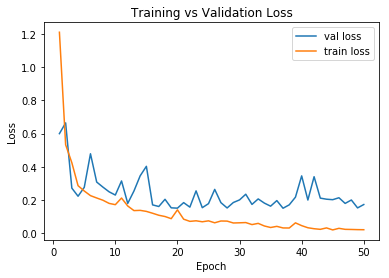

In [6]:
# display learning graph of training and validation loss
ep = [i for i in range(1,len(z['accuracy'])+1)]
plt.plot(ep,z['val_loss'])
plt.plot(ep,z['train_loss'])

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['val loss','train loss'])

94.87836107554418


Text(0, 0.5, 'Accuracy')

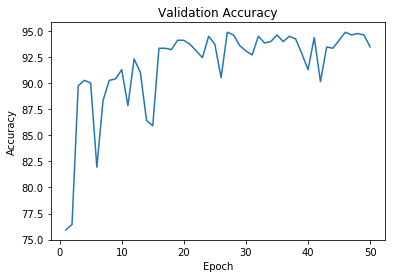

In [7]:
# display learning graph of accuracy 
print(max(z['accuracy']))
plt.plot(ep,z['accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [9]:
# load saved weights
model.load_state_dict(torch.load('savedmodels/model.pt'))
# run test dataset
load = test_model(loader['test'],model)

using gpu
Test Accuracy: 95.64660691421255 %
